In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn import metrics

In [3]:
def OneHotEncoding(labels):
    # convert array
    labels = np.array(labels)
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(labels)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

## Problem 1: Prisoner Delimma

In [4]:
df = pd.read_csv('UCI_Heart_Disease.csv',index_col=False)

## Preprocessing

In [5]:
# get label from dataframe
label = df['target'].to_numpy()
df = df.drop(columns ='target')

# locate the catagotical columns (ie.feature described by words, not numbers)
catagorical_col = []
columns = df.columns[:]
for col in columns:
    if type(df[col][0])==type('str'):
        catagorical_col.append(col)
        
# transform str feature to numerical feature
column_transformer = make_column_transformer(
    (OneHotEncoder(), catagorical_col), remainder = 'passthrough')
data = column_transformer.fit_transform(df)

# splite training and testing data
x_train, x_val, y_train, y_val = train_test_split(data,label,stratify=label,test_size = 0.2,random_state=99,shuffle=True)

# reshape
x_train = np.array(x_train).reshape([-1,30,1])
x_val = np.array(x_val).reshape([-1,30,1])
y_train = OneHotEncoding(y_train)
y_val = OneHotEncoding(y_val)


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(820, 30, 1)
(820, 2)
(205, 30, 1)
(205, 2)


## MLP Classification

In [7]:
#Number of classes, in this case 30 different speech commends
num_classes = 2
loss_function = 'BinaryCrossentropy'

#Define Model
model = Sequential()

# Dense 1
model.add(Dense(256, activation='relu',input_shape=(30,1)))
model.add(Dropout(0.3))

# Dense 2
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Dense 3
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# flatten
model.add(Flatten())

# FC, SVM
model.add(Dense(num_classes, activation='softmax'))
kernel_regularizer=tf.keras.regularizers.l1(0.001),
activity_regularizer=tf.keras.regularizers.l2(0.001),

#Compile
#model.compile(loss='squared_hinge', optimizer='adam', metrics='accuracy')
model.compile(loss= loss_function, optimizer='Adam', metrics='accuracy')

# tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30, 256)           512       
_________________________________________________________________
dropout (Dropout)            (None, 30, 256)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 30, 256)           65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 256)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 30, 256)           65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 256)           0         
_________________________________________________________________
flatten (Flatten)            (None, 7680)              0

In [8]:
history = model.fit(x_train, y_train, batch_size=50, epochs=100, verbose=2, validation_data=(x_val, y_val))

Epoch 1/100
17/17 - 1s - loss: 1.2056 - accuracy: 0.5451 - val_loss: 0.7724 - val_accuracy: 0.5366
Epoch 2/100
17/17 - 0s - loss: 0.7950 - accuracy: 0.6024 - val_loss: 0.6217 - val_accuracy: 0.6585
Epoch 3/100
17/17 - 0s - loss: 0.7074 - accuracy: 0.6280 - val_loss: 0.5873 - val_accuracy: 0.7317
Epoch 4/100
17/17 - 0s - loss: 0.6099 - accuracy: 0.6829 - val_loss: 0.5133 - val_accuracy: 0.7561
Epoch 5/100
17/17 - 0s - loss: 0.5119 - accuracy: 0.7695 - val_loss: 0.4072 - val_accuracy: 0.8341
Epoch 6/100
17/17 - 0s - loss: 0.4219 - accuracy: 0.8061 - val_loss: 0.3775 - val_accuracy: 0.8341
Epoch 7/100
17/17 - 0s - loss: 0.3707 - accuracy: 0.8366 - val_loss: 0.3674 - val_accuracy: 0.8293
Epoch 8/100
17/17 - 0s - loss: 0.3658 - accuracy: 0.8488 - val_loss: 0.3641 - val_accuracy: 0.8488
Epoch 9/100
17/17 - 0s - loss: 0.3460 - accuracy: 0.8537 - val_loss: 0.3636 - val_accuracy: 0.8488
Epoch 10/100
17/17 - 0s - loss: 0.3521 - accuracy: 0.8512 - val_loss: 0.3529 - val_accuracy: 0.8439
Epoch 11/

17/17 - 0s - loss: 0.3112 - accuracy: 0.8866 - val_loss: 0.3366 - val_accuracy: 0.8585
Epoch 84/100
17/17 - 0s - loss: 0.3099 - accuracy: 0.8768 - val_loss: 0.3342 - val_accuracy: 0.8683
Epoch 85/100
17/17 - 0s - loss: 0.3125 - accuracy: 0.8780 - val_loss: 0.3424 - val_accuracy: 0.8634
Epoch 86/100
17/17 - 0s - loss: 0.3111 - accuracy: 0.8854 - val_loss: 0.3362 - val_accuracy: 0.8634
Epoch 87/100
17/17 - 0s - loss: 0.3071 - accuracy: 0.8927 - val_loss: 0.3352 - val_accuracy: 0.8634
Epoch 88/100
17/17 - 0s - loss: 0.3098 - accuracy: 0.8866 - val_loss: 0.3372 - val_accuracy: 0.8683
Epoch 89/100
17/17 - 0s - loss: 0.3097 - accuracy: 0.8854 - val_loss: 0.3361 - val_accuracy: 0.8634
Epoch 90/100
17/17 - 0s - loss: 0.3083 - accuracy: 0.8817 - val_loss: 0.3354 - val_accuracy: 0.8634
Epoch 91/100
17/17 - 0s - loss: 0.3015 - accuracy: 0.8841 - val_loss: 0.3366 - val_accuracy: 0.8634
Epoch 92/100
17/17 - 0s - loss: 0.3014 - accuracy: 0.8866 - val_loss: 0.3385 - val_accuracy: 0.8634
Epoch 93/100


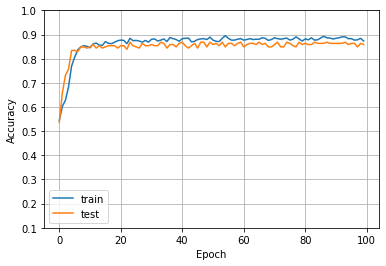

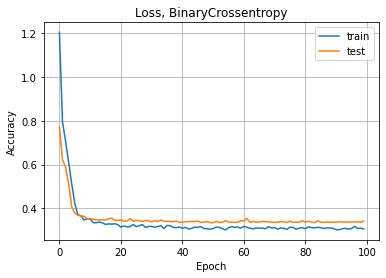

In [9]:
# display
plt.plot(history.history['accuracy'], label='train') 
plt.plot(history.history['val_accuracy'], label='test')
plt.grid()
plt.legend()
plt.xlabel('Epoch')
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.ylabel('Accuracy')
plt.savefig('mlp_acc.png',dpi=1080)
plt.show()


plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test') 
plt.grid()
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Loss, '+ loss_function)
# plt.savefig('loss.png',dpi=1080)
plt.show()